In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
dt=pd.read_csv("/home/sri/jupy/ML/gold_date .csv")

In [2]:
dt.head()

,DATE,22K,24K,SILVER
0,01-02-2024,5865.0,6397.0,76.5
1,02-02-2024,5865.0,6397.0,76.3
2,03-02-2024,5865.0,6397.0,76.5
3,05-02-2024,5795.0,6322.0,75.5
4,07-02-2024,5912.0,6454.1,73.5


In [6]:
dt.shape

(106, 4)

In [8]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    106 non-null    object 
 1   22K     106 non-null    float64
 2   24K     106 non-null    float64
 3   SILVER  106 non-null    float64
dtypes: float64(3), object(1)
memory usage: 3.4+ KB


In [10]:
dt.isnull().sum()

DATE      0
22K       0
24K       0
SILVER    0
dtype: int64

In [11]:
print(dt.columns)

Index(['DATE', '22K', '24K', 'SILVER'], dtype='object')


In [13]:
dt['DATE'] = dt['DATE'].str.strip()

In [15]:
dt['DATE'] = pd.to_datetime(dt['DATE'], format='%d-%m-%Y')

In [17]:
dt['Year'] = dt['DATE'].dt.year
dt['Month'] = dt['DATE'].dt.month
dt['Date'] = dt['DATE'].dt.day


In [19]:
dt.head()

,DATE,22K,24K,SILVER,Year,Month,Date
0,2024-02-01,5865.0,6397.0,76.5,2024,2,1
1,2024-02-02,5865.0,6397.0,76.3,2024,2,2
2,2024-02-03,5865.0,6397.0,76.5,2024,2,3
3,2024-02-05,5795.0,6322.0,75.5,2024,2,5
4,2024-02-07,5912.0,6454.1,73.5,2024,2,7


In [76]:
x=dt.drop(["DATE","22K","24K"],axis=1)
y=dt["24K"]

In [77]:
x

,SILVER,Year,Month,Date
0,76.5,2024,2,1
1,76.3,2024,2,2
2,76.5,2024,2,3
3,75.5,2024,2,5
4,73.5,2024,2,7
...,...,...,...,...
101,95.6,2024,7,23
102,89.0,2024,7,25
103,89.0,2024,7,26
104,89.5,2024,7,29


In [78]:
y

0      6397.0
1      6397.0
2      6397.0
3      6322.0
4      6454.1
        ...  
101    7364.0
102    6987.0
103    6987.0
104    6921.0
105    6900.0
Name: 24K, Length: 106, dtype: float64

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=42)

In [80]:
model=LinearRegression()

In [81]:
model.fit(x_train,y_train)

LinearRegression()

In [82]:
pred=model.predict(x_train)

In [83]:
error_score=metrics.r2_score(y_train,pred)

In [84]:
print(error_score)

0.7066188444527687


Text(0.5, 1.0, 'actual vs predicted prices')

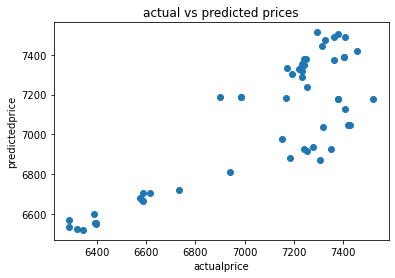

In [85]:
plt.scatter(y_train,pred)
plt.xlabel("actualprice")
plt.ylabel("predictedprice")
plt.title("actual vs predicted prices")

In [86]:
x_train.head(1)

,SILVER,Year,Month,Date
25,80.0,2024,3,18


In [87]:
input=pd.DataFrame([[91.7,2024,8,19]],columns=['SILVER','Year','Month','Date'])

In [88]:
model.predict(input)

array([7320.20816485])